# Question 2: Finding Groupings in Human's Mitochondrial SNP/Mutations Patterns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Import Libraries

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load Data

In [4]:
mito = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")
mito.head(3)

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,Position_site,3.0,10,16,18,26,35,40,41,47,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,CNSS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,RSRS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
mito.shape

(1077, 2712)

# Preprocessing the Dataset


In [6]:
#Imputation was the focus here to replace missing values
Y_mito = mito[u'Group']
X_mito = mito.drop(u'Group', axis=1)
X_mito.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,3.0,10,16,18,26,35,40,41,47,57,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [7]:
#The actual imputation was done here
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_mito)
X_imputed = pd.DataFrame(X_imputed) 
X_imputed.columns = X_mito.columns  

In [8]:
#Number of missing values after imputation was zero(0)
X_imputed.isna().sum().sum()

0

In [9]:
X_mito = X_imputed
X_mito = X_mito.drop([0,1,2])
X_mito.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Association was performed here for groupings
apriori(X_mito, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.270019,(X33)
1,0.403166,(X1278)
2,0.406890,(X1447)
3,0.480447,(X1586)
4,0.406890,(X1647)
5,0.465549,(X1919)
6,0.344507,(X2384)
7,0.469274,(X2605)
8,0.402235,"(X1447, X1278)"
9,0.398510,"(X1586, X1278)"


# Hierarchical clustering

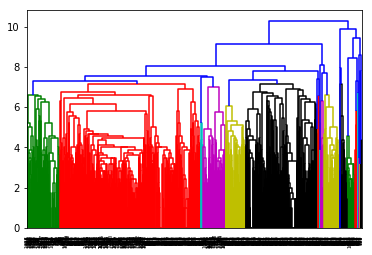

In [11]:
hier_type1 = linkage(X_mito, 'complete')
dend = dendrogram(hier_type1)

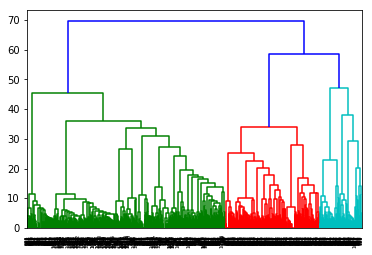

In [12]:
hier_type2 = linkage(X_mito, 'ward')
dend = dendrogram(hier_type2)

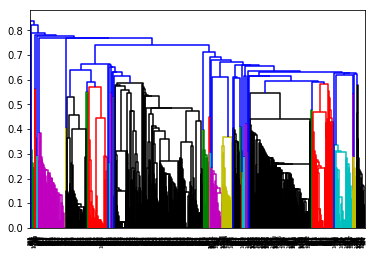

In [13]:
hier_type3 = linkage(X_mito, 'single',metric="cosine")
dend = dendrogram(hier_type3)

# PCA to reduce dimensions

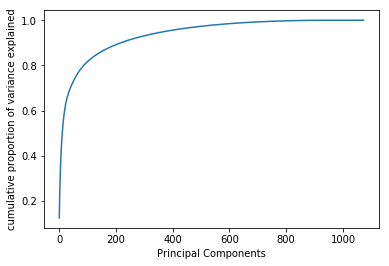

In [14]:
pca = PCA().fit(X_mito)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('cumulative proportion of variance explained');

In [15]:
#From the graph above, we use the first 200 PCA's
pca = PCA(n_components=200)
pca.fit(X_mito)
X_mito_200PCA = pca.transform(X_mito)

# K-means Clustering

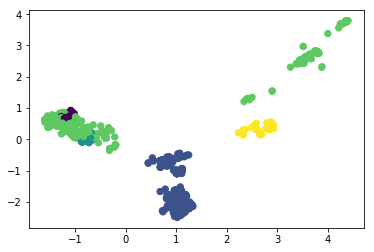

In [16]:
#MiniBatchKmeans Clustering
clustering = MiniBatchKMeans(n_clusters=5).fit(X_mito_200PCA)
labels = clustering.labels_
plt.scatter(X_mito_200PCA[:, 0], X_mito_200PCA[:, 1], c=labels, s=40, cmap='viridis')

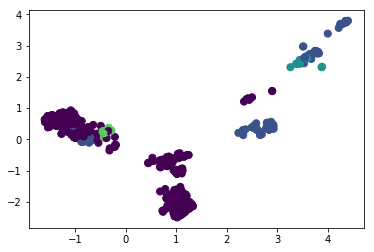

In [17]:
#Spectral Clustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_mito_200PCA)
plt.scatter(X_mito_200PCA[:, 0], X_mito_200PCA[:, 1], c=labels,
            s=50, cmap='viridis');

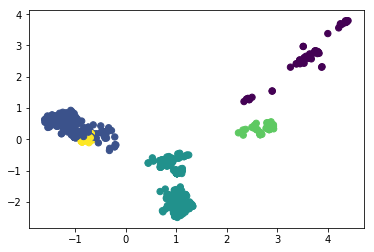

In [21]:
#Agglomerative Clustering
#This measures together successfully pair of clusters
clustering = AgglomerativeClustering(n_clusters=5).fit(X_mito_200PCA)
labels = clustering.labels_
plt.scatter(X_mito_200PCA[:, 0], X_mito_200PCA[:, 1], c=labels, s=40, cmap='viridis')

# Comparison between haplogroups and clustering labels

In [22]:
labels = pd.DataFrame(labels)
labels.columns = ['number_group']
Y_mito = pd.DataFrame(Y_mito)
types = pd.merge(Y_mito, labels, left_index=True, right_index=True)
types.head()

,Group,number_group
0,Position_site,1
1,CNSS,1
2,RSRS,1
3,H,1
4,T,1


In [28]:
hap = types.Group.unique()
clus = types.number_group.unique()

first = []
second = []
third = []

for x in hap :
    x=x
    for j in clus :
        j=j
        a = types[types["number_group"]== j]
        b = a[a['Group'] == x].count()['Group']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [36]:
first = pd.DataFrame(first)
first.columns = ['Type_Haplo']
second = pd.DataFrame(second)
second.columns = ['Clusters']
third = pd.DataFrame(third)
third.columns = ['Counts']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2 = df2.sort_values(by = 'Counts', ascending= False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)
    
#The table below gives types of haplogroup and the clusters they belongs to
#The table also depicts the counts of the haplogroup

,Type_Haplo,Clusters,Counts
15,H,1,164
35,U,1,78
86,D,2,46
70,B,1,38
20,T,1,35
141,L2,2,33
30,J,1,31
85,D,1,30
105,A,1,29
106,A,2,29


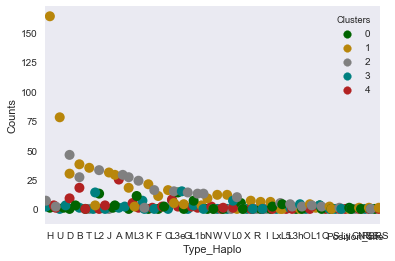

In [37]:
#Scatterplot for the comparison above
sns.set(style="dark", palette="deep")
sns.swarmplot(x="Type_Haplo", y=r"Counts", hue="Clusters",
              palette=["darkgreen", "darkgoldenrod", "gray","teal","firebrick"], data=df2, size =10)

In [ ]:
#From the scatterplot as compared to the table above, the haplogroup "H" had the highest
#counts (164) which is in clusters (1)
#The second highest haplogroup "U" had counts (78) which was also 
#in cluster (1) respectively.